# Random matrix with correlated entries
We consider the following random matrix:
Let $x_1, x_2, \cdots, x_n\in \mathbb R^d$ be i.i.d. copies of random Gaussian vector $\mathcal N(0, I_d)$. We denote 
$$
x\odot y=\rm{vec}[x\otimes y]\in \mathbb R^{d\times d},
$$
with the $(d*(i-1)+j-1)$-th entry given by $x_iy_j$. 

We denote $X^{(2)}$ the random $n\times d^2$ matrix, with $i$-th row given by $x_i\odot x_i$. More generally, we can consider the matrix $X^{(k)}$ the random $n\times d^k$ matrix, with $i$-th row given by 
$x_i \odot x_i\odot\cdots \odot x_i\in \mathbb R^{d^k}$. Prove that if $d^k\gg n$ then $X^{(k)}$ is invertible.

4.820536409387159


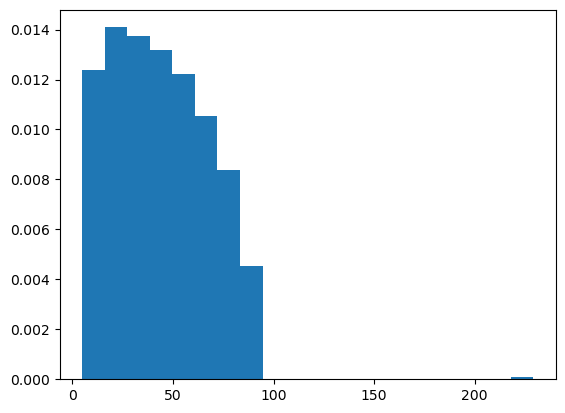

In [1]:
import numpy as np
from matplotlib import pyplot as plt
n=1000
d=50
X2=np.zeros((n, d*d))
for i in range(n):
    #x=np.random.normal(0,1,d)
    x=np.random.binomial(size=d, n=1, p= 0.5)*2-1
    
    y=np.outer(x,x).flatten()
    X2[i,:]=y

u,sv,vt=np.linalg.svd(X2)
print(sv[-1])
plt.hist(sv, 20, density=True)
plt.show() 

0.11759954191724127


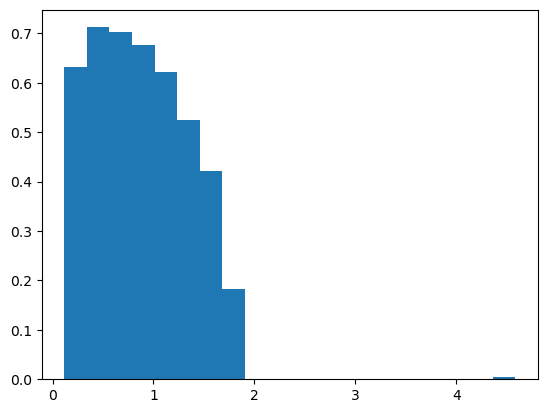

In [2]:
import numpy as np
from matplotlib import pyplot as plt
n=1000
d=50
X2=np.zeros((n, d*d))
for i in range(n):
    x=np.random.normal(0,1,d)
    x=x/np.linalg.norm(x)
    y=np.outer(x,x).flatten()
    X2[i,:]=y

u,sv,vt=np.linalg.svd(X2)
print(sv[-1])
plt.hist(sv, 20, density=True)
plt.show() 

**more components case**

We consider random matrix with three parts $n=d^3$
    \begin{align}
    X^{(1)}+ X^{(2)}+ X^{(4)}
    \end{align}
    

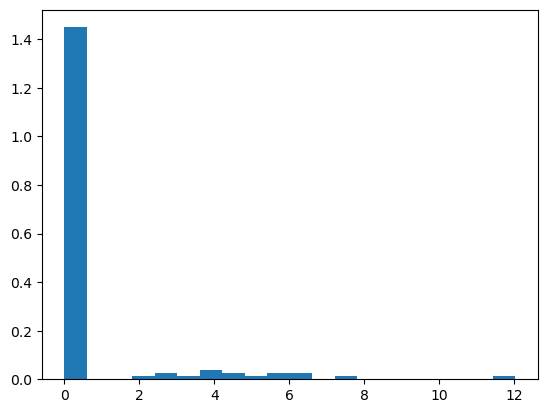

In [3]:
import numpy as np
from matplotlib import pyplot as plt
l=3
d=5
sqd=np.sqrt(d)
n=d**l

X1=np.zeros((n, d))
X2=np.zeros((n, d*d))
X3=np.zeros((n, d*d*d))
X4=np.zeros((n, d*d*d*d))

for i in range(n):
    x=np.random.binomial(size=d, n=1, p= 0.5)*2-1
    y1=x
    y2=np.outer(x,x).flatten()
    y3=np.outer(y2,x).flatten()
    y4=np.outer(y2,y2).flatten()
    X1[i,:]=y1
    X2[i,:]=y2
    X3[i,:]=y3
    X4[i,:]=y4

X=(np.matmul(X1, X1.transpose())/sqd+np.matmul(X2, X2.transpose())/(sqd**2))/np.sqrt(n)
 #  +np.matmul(X3, X3.transpose())/(sqd**3)++np.matmul(X4, X4.transpose())/(sqd**4))/np.sqrt(n)



eig=np.linalg.eigvalsh(X)
plt.hist(eig, 20, density=True)
plt.show() 


more components case

We consider random matrix with three parts  $n=d^2$
 
𝑋(1)+𝑋(2)

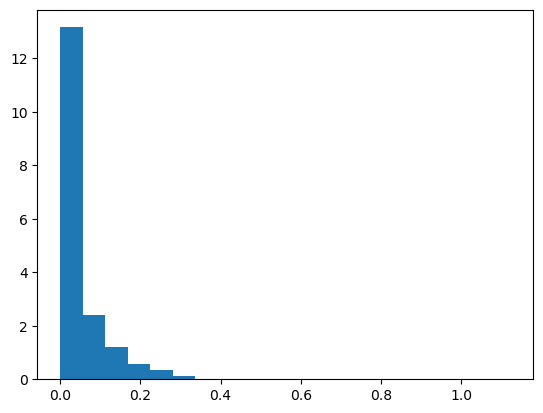

In [4]:
import numpy as np
from matplotlib import pyplot as plt
l=2
d=30
sqd=np.sqrt(d)
n=d**l

X1=np.zeros((n, d))
X2=np.zeros((n, d*d))

for i in range(n):
    x=np.random.normal(0,1,d)
    y1=x
    y2=np.outer(x,x).flatten()
    X1[i,:]=y1
    X2[i,:]=y2


#X=(np.matmul(X1, X1.transpose())/sqd+np.matmul(X2, X2.transpose())/(sqd**2)
#   +np.matmul(X3, X3.transpose())/(sqd**3)++np.matmul(X4, X4.transpose())/(sqd**4))/np.sqrt(n)
X=np.matmul(X1, X1.transpose())/(sqd*n)+np.matmul(X2, X2.transpose())/((sqd**2)*n)
#X=np.matmul(X4, X4.transpose())/(sqd**4)
#for i in range(n):
#    X[i,i]=0

eig=np.linalg.eigvalsh(X)
plt.hist(eig, 20, density=True)
plt.show() 


Consider a matrix with ij-th entry given by $x_i^2 *x_j^2$

[-9.49430493e+01 -2.36791593e-14 -1.96231583e-14 ...  1.09309603e+01
  1.09556057e+01  1.04586324e+02]


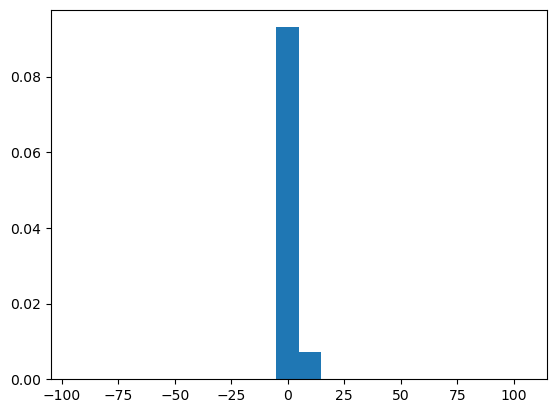

In [5]:
import numpy as np
from matplotlib import pyplot as plt
d=500
C=10
n=C*d

X1=np.zeros((n, d))

for i in range(n):
    x=np.random.normal(0,1,d)
#    x=np.random.binomial(size=d, n=1, p= 0.5)*2-1
    y=x*x
    X1[i,:]=y


X=(np.matmul(X1, X1.transpose())-d)/np.sqrt(d*n)

eig=np.linalg.eigvalsh(X)
plt.hist(eig, 20, density=True)
print(eig)
plt.show() 



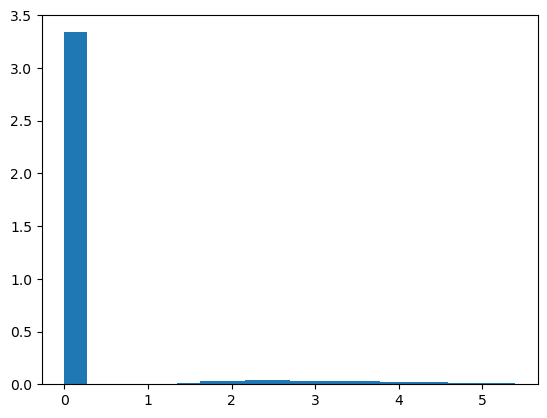

In [6]:
import numpy as np
from matplotlib import pyplot as plt
d=300
C=10
n=C*d

X1=np.zeros((n, d))

for i in range(n):
    x=np.random.normal(0,1,d)
    X1[i,:]=x


X=(np.matmul(X1, X1.transpose()))/np.sqrt(d*n)


eig=np.linalg.eigvalsh(X)
plt.hist(eig, 20, density=True)
plt.show() 


**Singular Value of Neural Tangent Kernel**

We consider the Neural Tangent Kernel of one-hidden layer neural network
$$
f(x,\theta)=\sum_{i=1}^m \sigma(w_i x).
$$
where $m$ is the number of hidden nodes, the input $x\in \mathbb R^d$, and $\theta=(w_1, w_2,\cdots, w_m)$. 

The derivative with respect to $w_i$ is given by
$$
\partial_{w_i}f(x,\theta)=\sigma'(w_i x)x
$$
The Neural Tangent Kernel is given by
$$
K(x,x')=\sum_{i=1}^m \sigma'(w_i x)\sigma'(w_i x')\langle x, x'\rangle.
$$

To study the smallest eigenvalue of $K$, we can instead studying the smallest singular value of 
$$
V=[\sigma'(w_j x_i)x_i^\top]_{1\leq i\leq m, 1\leq j\leq n}.
$$
Prove that if $w_i,x_i\in \mathbb R^d$ are i.i.d. Gaussian vector, and $md\gg n$, then $K$ is invertible. 

We will test for the kernel PCA, the model is given by $K(\langle x_i, x_j\rangle)$, where $x_i$ are independent Gaussian vectors with covariance given by $I+\lambda v v^*$.

In the following example, $x_i$ are of dimension $d$, and there are $n$ data points, the data are independent Gaussian $N(0,1)$ they are of the same order.
The kernel function is simply given by $K(x)=x^2$.

[ 2.24451637  2.25296214  2.25997954  2.30482035 25.23396833]


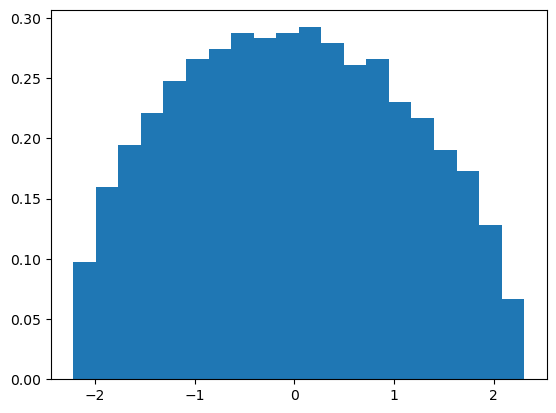

In [72]:
import numpy as np
from matplotlib import pyplot as plt

def Kfun(x):
    (a,b)=x.shape
    y=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            if i!=j:
                y[i,j]=x[i,j]**2
    return y
            

n=1000
d=800


data=np.random.normal(0,1,(n,d))
Gram=np.matmul(data, data.transpose())/np.sqrt(n)
X2=Kfun(Gram)/np.sqrt(n)


la=np.linalg.eigvalsh(X2)
plt.hist(la[0:-1], 20, density=True)
print(la[-5:])
plt.show() 

In the following example, $x_i$ are of dimension $d$, and there are $n$ data points, they are of the same order. the data are Gaussian vectors with covariance $I_d+\lambda v v^*$. 
The kernel function is simply given by $K(x)=x^2$.

[ 7.32100547  7.34518283  7.45928717  7.52970235 13.58346987]


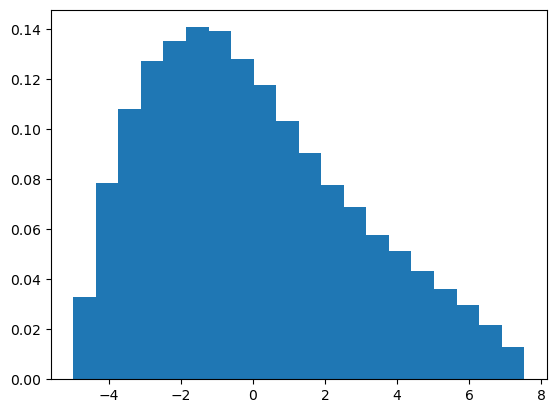

In [78]:
import numpy as np
from matplotlib import pyplot as plt

def Kfun(x):
    (a,b)=x.shape
    y=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            if i!=j:
                y[i,j]=x[i,j]**3
    return y
            

n=2000
d=1600
snr=4
#v=np.random.normal(0,1,d)
v=np.zeros(d)
v[0]=1

Sigma=np.eye(d)+snr* np.outer(v,v)/np.dot(v,v)
data=np.random.normal(0,1,(n,d))
Gram=np.matmul(np.matmul(data,Sigma), data.transpose())/np.sqrt(n)
X2=Kfun(Gram)/np.sqrt(n)


la=np.linalg.eigvalsh(X2)
plt.hist(la[0:-1], 20, density=True)
print(la[-5:])
plt.show() 

In [51]:
v=np.eye(3)
u=np.outer(v,v.transpose())
u

array([[1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.]])

14


NameError: name 'plot' is not defined

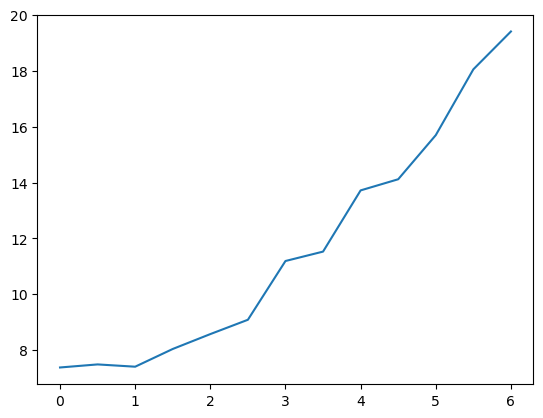

In [82]:
import numpy as np
from matplotlib import pyplot as plt

def Kfun(x):
    (a,b)=x.shape
    y=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            if i!=j:
                y[i,j]=x[i,j]**3
    return y
            

n=2000
d=1600



#return the outlier largest eigenvalue
def extreme(snr):
    v=np.random.normal(0,1,d)
    Sigma=np.eye(d)+snr* np.outer(v,v)/np.dot(v,v)
    data=np.random.normal(0,1,(n,d))
    Gram=np.matmul(np.matmul(data,Sigma), data.transpose())/np.sqrt(n)
    X2=Kfun(Gram)/np.sqrt(n)


    la=np.linalg.eigvalsh(X2)
    return(la[-1])

snrlist=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
eiglist=np.zeros(len(snrlist))
for i in range(len(snrlist)):
    eiglist[i]=extreme(snrlist[i])

plt.plot(snrlist,eiglist)
plot.show()

AttributeError: 'function' object has no attribute 'show'

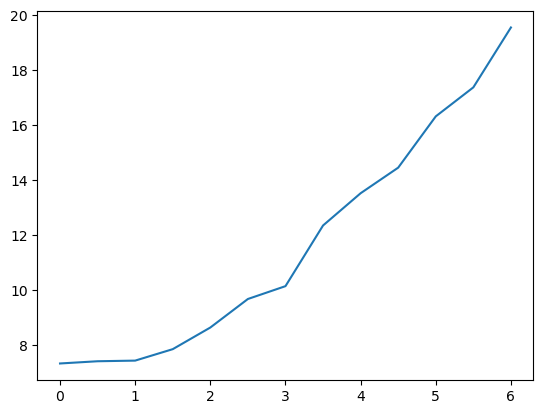

In [81]:
import numpy as np
from matplotlib import pyplot as plt

def Kfun(x):
    (a,b)=x.shape
    y=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            if i!=j:
                y[i,j]=x[i,j]**3
    return y
            

n=2000
d=1600



#return the outlier largest eigenvalue
def extreme(snr):
    v=np.zeros(d)
    v[1]=1
    Sigma=np.eye(d)+snr* np.outer(v,v)/np.dot(v,v)
    data=np.random.normal(0,1,(n,d))
    Gram=np.matmul(np.matmul(data,Sigma), data.transpose())/np.sqrt(n)
    X2=Kfun(Gram)/np.sqrt(n)


    la=np.linalg.eigvalsh(X2)
    return(la[-1])

snrlist=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
eiglist=np.zeros(len(snrlist))
for i in range(len(snrlist)):
    eiglist[i]=extreme(snrlist[i])

plt.plot(snrlist,eiglist)
plt.plot.show()